In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
yolo=cv2.dnn.readNet("./yolov3.weights","./yolov3.cfg") # add path of both downloaded files

In [4]:
classes=[]
with open("./coco.names",'r') as f : # add path
  classes=f.read().splitlines()

In [5]:
len(classes)

80

In [6]:
img=cv2.imread("./img.jpg") # add path
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

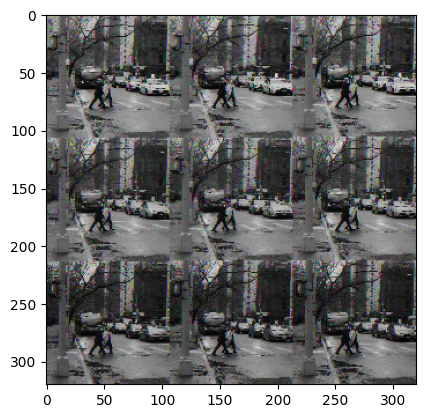

In [8]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [9]:
yolo.setInput(blob)

In [10]:
output_layer_name=yolo.getUnconnectedOutLayersNames()
layer_output=yolo.forward(output_layer_name)

In [12]:
output_layer_name

('yolo_82', 'yolo_94', 'yolo_106')

In [24]:
height,width,_ =img.shape
boxes=[]
confidences=[]
class_ids=[]

for output in layer_output :
  for detection in output :
    score=detection[5:]
    class_id=np.argmax(score)
    confidence=score[class_id]
    if confidence > 0.7 :
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)

      x=int(center_x-w/2)
      y=int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [17]:
len(boxes)

16

In [18]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [19]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [27]:
for i in indexes.flatten():
  x,y,w,h=boxes[i]
  label=str(classes[class_ids[i]])
  confi=str(round(confidences[i],2))
  color=colors[i]

  cv2.rectangle(img,(x,y),(x+w,y+h),color,8)
  cv2.putText(img,label+" "+confi,(x,y+20),font,2,(255,255,255),3)

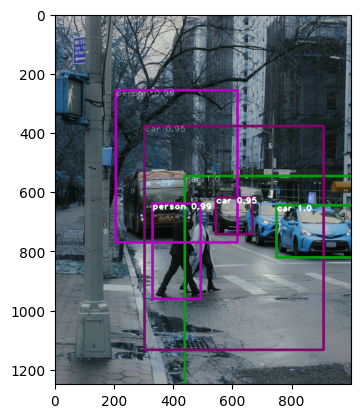

In [28]:
plt.imshow(img)